In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyEclipseDVH import eclipse_DVH
from scipy import interpolate

def get_Dmetric(df, metric_pct):   # for D50% pass 50
    indexes = np.array(df.index)   # get test data index and values
    values = np.array(df.values)
    f = interpolate.interp1d(values, indexes)  # create the interp object
    return f(metric_pct)

def get_HI(df):   # for D50% pass 50
    indexes = np.array(df.index)   # get test data index and values
    values = np.array(df.values)
    f = interpolate.interp1d(values, indexes)  # create the interp object
    HI = (f(2.0) - f(98.0))/f(50.0)
    return HI

In [2]:
ls

 Volume in drive C is WINDOWS
 Volume Serial Number is AE83-8D62

 Directory of C:\Users\RCole02.ROYALSURREY\Desktop\GitHub\Useful-python-for-medical-physics\Experiments in ipython notebooks\Project\HN\Case1 9-2-2017

09/02/2017  11:01    <DIR>          .
09/02/2017  11:01    <DIR>          ..
09/02/2017  11:01    <DIR>          .ipynb_checkpoints
09/02/2017  11:01    <DIR>          __pycache__
06/02/2017  17:00            58,992 Case1 9-2-2017.ipynb
21/11/2016  10:42         2,877,016 Case1_AAA.txt
21/11/2016  10:42         2,864,463 Case1_Dm.txt
25/11/2016  09:23             3,006 pyEclipseDVH.py
               4 File(s)      5,803,477 bytes
               4 Dir(s)  365,019,357,184 bytes free


In [3]:
AAA = eclipse_DVH('Case1_AAA.txt')
AXB = eclipse_DVH('Case1_Dm.txt')

Case1_AAA.txt loaded 	 patID = Case1_AAA	 Prescription [Gy] = 65.000
Case1_Dm.txt loaded 	 patID = Case1_AXB_Dm	 Prescription [Gy] = 65.000


In [4]:
AXB.DVH_df.columns

Index(['Pseudo Other_P', 'Pseudo Oral Cav_', 'Pseudo Midline_P', 'PTV2 edit_P',
       'PTV2_P', 'PTV1 edit_P', 'PTV1_P', 'Lt Par edit_P', 'Body_P',
       'Annulus High_P', 'Annulus Low_P', 'BS + 5mm_P', 'Optic Chiasm_P',
       'R Optic Nerve_P', 'L Optic Nerve_P', 'R Lens_P', 'L Lens_P',
       'L Orbit_P', 'R Orbit_P', 'R Parotid_P', 'L Parotid_P', 'Brain Stem_P',
       'Spinal Cord_P', 'CTV54_P', 'GTV+ 10MM_P', 'GTV_P', 'CTV65_P',
       'Pseudo Post_P', 'Rt Par edit_P', 'SC + 3mm_P', 'SC + 5mm_P',
       'Pseudo PTV1_P', 'Pseudo PTV2_P', 'Artifact Dental_',
       'ArtifactContrast', 'Dose 6175[cGy]_P', 'Dose 5130[cGy]_P',
       'PseudoPostBrain_', 'Dummy_P'],
      dtype='object')

(50, 75)

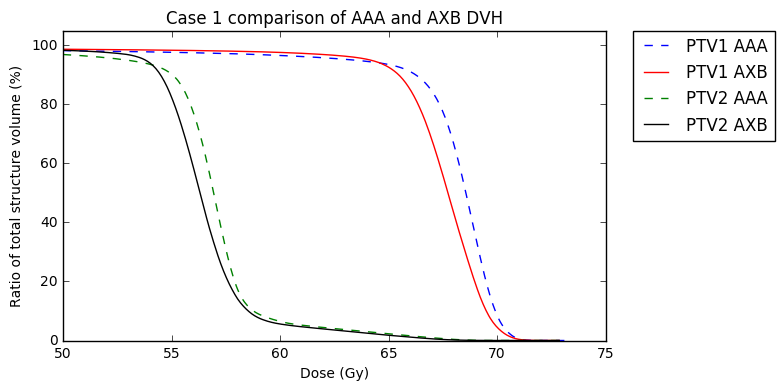

In [7]:
width=7
height=4
plt.figure(figsize=(width, height))

structure = 'PTV1_P'
plt.plot(AAA.DVH_df[structure], label="PTV1 AAA", color='b', ls='--')
plt.plot(AXB.DVH_df[structure], label="PTV1 AXB",  color='r' )

structure = 'PTV2_P'
plt.plot(AAA.DVH_df[structure], label="PTV2 AAA", color='g', ls='--')
plt.plot(AXB.DVH_df[structure], label="PTV2 AXB",  color='k' )

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Case 1 comparison of AAA and AXB DVH')
plt.xlabel('Dose (Gy)')
plt.ylabel('Ratio of total structure volume (%)')
plt.ylim([0,105])
plt.xlim([50,75])

In [8]:
Comparison_df = pd.concat([ AAA.metrics_df['PTV1_P'], 
                            AXB.metrics_df['PTV1_P'], 
                           
                           AAA.metrics_df['PTV2_P'], 
                           AXB.metrics_df['PTV2_P']], 
                           axis=1)
Comparison_df

,PTV1_P,PTV1_P,PTV2_P,PTV2_P
Metric,,,,
Structure,PTV1_P,PTV1_P,PTV2_P,PTV2_P
Approval Status,Unapproved,Unapproved,Unapproved,Unapproved
Plan,Case1_AAA,Case1_AXB_Dm,Case1_AAA,Case1_AXB_Dm
Course,1,1,1,1
Volume [cmÂ³],504.8,504.8,228.5,228.5
Dose Cover.[%],100.0,100.0,100.0,100.0
Sampling Cover.[%],100.0,100.0,100.0,100.0
Min Dose [%],0.0,0.0,0.5,0.0
Max Dose [%],112.8,112.3,108.4,109.2
